In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import glob
import cv2
import os
from os import listdir
from numpy import asarray
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.layers import Dense,Activation,BatchNormalization, Dropout, LSTM, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop, SGD
from keras.utils import np_utils
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [4]:
folder1 = '/content/drive/MyDrive/FACES/TAT'
folder2 = '/content/drive/MyDrive/FACES/TLUAN/dataSet'
folder3 = '/content/drive/MyDrive/TAN'
photos, labels = list(), list()
for file in listdir(folder1):
  photo = load_img(folder1+'/'+file, target_size=(150,150))
  photo = img_to_array(photo)
  photos.append(photo)              
  labels.append(0) 
for file in listdir(folder2):
  photo = load_img(folder2+'/'+file, target_size=(150,150))
  photo = img_to_array(photo)
  photos.append(photo)               
  labels.append(1) 
for file in listdir(folder3):
  photo = load_img(folder3+'/'+file, target_size=(150,150))
  photo = img_to_array(photo)
  photos.append(photo)              
  labels.append(2)  
photos = asarray(photos)            
labels = asarray(labels)           
class_name = ['Anh Tú','Tấn Luân','Nhật Tấn']   
print(photos.shape, labels.shape, class_name)


(596, 150, 150, 3) (596,) ['Anh Tú', 'Tấn Luân', 'Nhật Tấn']


In [5]:
x_train, x_test, y_train, y_test = train_test_split(photos, labels, test_size=0.25, random_state=5)   #tạo dữ liệu train 75% và test 25%
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(447, 150, 150, 3) (149, 150, 150, 3)
(447,) (149,)


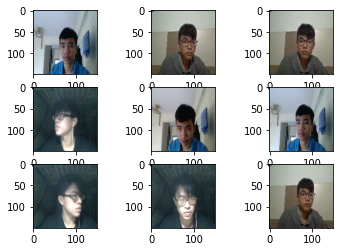

In [6]:
x_train_show = x_train.astype(int)            
import matplotlib.pyplot as plt
from matplotlib.image import imread
for i in range(9):
  plt.subplot(330+i+1)
  plt.imshow(x_train_show[i])
plt.show()

In [7]:
x_train = x_train.reshape(447, 67500)
x_test = x_test.reshape(149, 67500)
x_train/=255
x_test/=255
y_train=np_utils.to_categorical(y_train)
y_test=np_utils.to_categorical(y_test)


In [8]:
model = Sequential()
model.add(Dense(1024, kernel_initializer='normal',activation='relu', input_shape = (67500, )))
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])
history = model.fit(x_train,y_train, batch_size=64,epochs=10,verbose=1,validation_data = (x_test, y_test))

Epoch 1/10
7/7 [==============================] - 4s 109ms/step - loss: 202.9695 - accuracy: 0.4228 - val_loss: 2.7254 - val_accuracy: 0.6443
Epoch 2/10
7/7 [==============================] - 0s 45ms/step - loss: 12.9348 - accuracy: 0.7785 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/10
7/7 [==============================] - 0s 50ms/step - loss: 0.0438 - accuracy: 0.9978 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/10
7/7 [==============================] - 0s 52ms/step - loss: 0.0042 - accuracy: 0.9978 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/10
7/7 [==============================] - 0s 45ms/step - loss: 5.3337e-10 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/10
7/7 [==============================] - 0s 45ms/step - loss: 5.3337e-10 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/10
7/7 [==============================] - 0s 44ms/step - loss: 5.3337e-10 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accu

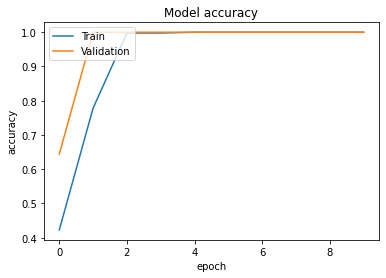

In [9]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Validation'], loc='upper left')

[[1.0000000e+00 0.0000000e+00 1.4569816e-35]]
Á, Anh Tú nè!


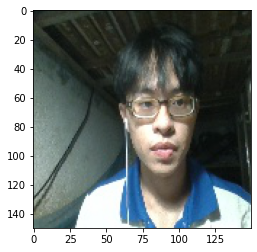

In [19]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img
from google.colab.patches import cv2_imshow

img = load_img('AnhTuTest1.jpg', target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,67500)
img = img.astype('float32')
img/=255.0

a = np.argmax(model.predict(img), axis=-1)
print(model.predict(img))
print('Á,',class_name[int(a)],'nè!')

[[3.0410925e-07 9.9999964e-01 6.4432492e-15]]
Á, Tấn Luân nè!


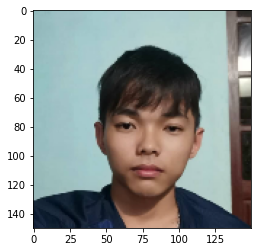

In [21]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img
from google.colab.patches import cv2_imshow

img = load_img('Luan0.png', target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,67500)
img = img.astype('float32')
img/=255.0

a = np.argmax(model.predict(img), axis=-1)
print(model.predict(img))
print('Á,',class_name[int(a)],'nè!')